In [1]:
# import sys
# !{sys.executable} -m pip install pylatex
! ls ./csv

dpr.csv  drp_08192019.csv


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

today = dt.date.today()
today_str = f'{today.year}_{today.month}_{today.day}'

df = pd.read_csv('./csv/dpr.csv')
df['Project'] = df.apply(lambda row: row.Project.upper().replace('  ', ' '), axis=1)
df['ApplicationType'] = df.apply(lambda row: row.Type.upper(), axis=1)
df['Planner'] = df.apply(lambda row: row.Planner.upper(), axis=1)
df['Engineer'] = df.apply(lambda row: row.Engineer.upper(), axis=1)
df['ApplicationSubmission'] = df.apply(lambda row: dt.date(int(row['Submission Date'].split('/')[2]), int(row['Submission Date'].split('/')[0]), int(row['Submission Date'].split('/')[1]),), axis=1)
df['CommentsDue'] = df.apply(lambda row: dt.date(int(row['Comments Due'].split('/')[2]), int(row['Comments Due'].split('/')[0]), int(row['Comments Due'].split('/')[1]),), axis=1)
drop = ['Type', 'Submission Date', 'Comments Due', 'Comments Sent', 'Resubmission Due']
df = df.drop(drop, axis = 1)
df['CommentTimeline'] = df.apply(lambda row: row.CommentsDue - row.ApplicationSubmission, axis = 1)

df['TimeRemaining'] = df.apply(lambda row: row.CommentsDue - today, axis = 1)
df['TimeRemainingInt'] = df.apply(lambda row: row.TimeRemaining.days, axis = 1)
df['PercentTimeRemaining'] = df.apply(lambda row: round(row.TimeRemaining / row.CommentTimeline,2), axis = 1)

conditions = [
    (df.TimeRemainingInt < 0),
    (df.TimeRemainingInt <= 7) & (df.TimeRemainingInt >= 0),
    (df.TimeRemainingInt > 7) & (df.TimeRemainingInt <= 14),
    (df.TimeRemainingInt > 14)
]

choices = ['Overdue', '0-7 Days','8-14 Days','> 14 Days']

df['PieTimeline'] = np.select(conditions, choices, default='No')

exclude = ['AS-BUILTS', 'BOUNDARY LINE ADJUSTMENT']
keep = [x for x in df.ApplicationType.unique().tolist() if x not in exclude]

df['FullCommentPeriod'] = df.apply(lambda row: (row.CommentsDue - row.ApplicationSubmission).days, axis=1)

df = df.loc[df.ApplicationType.isin(keep)]
#df.to_excel(f'./Development_Application_Review_Post_Manipulations_{today_str}.xlsx')

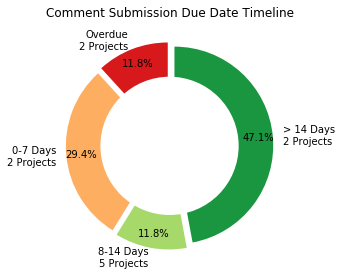

In [3]:
def pie_timeline():
    classes = ['Overdue', '0-7 Days', '8-14 Days', '> 14 Days']
    sizes = [df.loc[df.PieTimeline == x].shape[0] for x in classes]
    labels = [f'Overdue\n{sizes[0]} Projects', f'0-7 Days\n{sizes[0]} Projects', f'8-14 Days\n{sizes[1]} Projects', f'> 14 Days\n{sizes[2]} Projects']
    colors = ['#d7191c','#fdae61','#a6d96a','#1a9641']
    explode = (0.05,0.05,0.05,0.05)

    plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title('Comment Submission Due Date Timeline')
    plt.tight_layout()
    
    plt.savefig('./output/drp_pie.png', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='letter', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
pie_timeline()

In [4]:
df.columns
df

,Project,Planner,Engineer,ApplicationType,ApplicationSubmission,CommentsDue,CommentTimeline,TimeRemaining,TimeRemainingInt,PercentTimeRemaining,PieTimeline,FullCommentPeriod
2,GREENLEAF CENTER AMENDMENT,HALUSKA,SIBOLD,SITE PLAN AMENDMENT,2019-07-19,2019-08-16,28 days,-3 days,-3,-0.11,Overdue,28
3,100 AVON - RESUBMISSION 3,HALUSKA,BLAKE,PRELIMINARY SITE PLAN,2019-07-02,2019-08-16,45 days,-3 days,-3,-0.07,Overdue,45
4,AGNESE STREET TING UTILITY WORK - RESUBMISION 1,WINTER,BLAKE,UTILITY PLAN,2019-07-24,2019-08-22,29 days,3 days,3,0.10,0-7 Days,29
5,SHENTEL RUGBY ROAD UTILITY EXTENSION,WINTER,SIBOLD,UTILITY PLAN,2019-07-25,2019-08-22,28 days,3 days,3,0.11,0-7 Days,28
6,CODE BUILDING RIGHT-OF-WAY PLAN,HALUSKA,BLAKE,SITE PLAN AMENDMENT,2019-06-25,2019-08-23,59 days,4 days,4,0.07,0-7 Days,59
7,QUIRK HOTEL PAVILLION,HALUSKA,BLAKE,FINAL SITE PLAN,2019-06-26,2019-08-23,58 days,4 days,4,0.07,0-7 Days,58
8,STONEHENGE PUD,HALUSKA,BLAKE,SITE PLAN AMENDMENT,2019-07-24,2019-08-23,30 days,4 days,4,0.13,0-7 Days,30
9,105 DAVID TERRACE SD,ALFELE,BLAKE,FINAL SITE PLAN,2019-07-10,2019-08-29,50 days,10 days,10,0.20,8-14 Days,50
10,DAIRY CENTRAL PHASE 1 - RESUBMISSION 1,HALUSKA,SIBOLD,SITE PLAN AMENDMENT,2019-07-16,2019-08-30,45 days,11 days,11,0.24,8-14 Days,45
11,FRIENDSHIP COURT - PHASE 1,HALUSKA,BLAKE,FINAL SITE PLAN,2019-08-12,2019-09-03,22 days,15 days,15,0.68,> 14 Days,22


In [5]:
table_df = pd.DataFrame(df[['Project', 'ApplicationType', 'CommentsDue', 'FullCommentPeriod', 'Planner', 'Engineer']], copy=True).sort_values('CommentsDue')

col_labels = ['Project', 'Application Type', 'Comments Due', 'Comment Period', 'Planner', 'Engineer']
cell_text = []
t = []
cell_colors = []
for x in table_df.index.values.tolist():
    t.append(table_df.loc[df.index == x].values.tolist())
colors = ['#d7191c','#fdae61','#a6d96a','#1a9641']

for x in t:
    cell_text.append(x[0])
    time_delta = (x[0][2] - today).days
    if time_delta < 0:
        cell_colors.append('#d7191c')
    elif 0 <= time_delta <= 7:
        cell_colors.append('#fdae61')
    elif 7 < time_delta <= 14:
        cell_colors.append('#a6d96a')
    elif time_delta > 14:
        cell_colors.append('#1a9641')

cell_colors = [[x,x,x,x,x,x] for x in cell_colors]

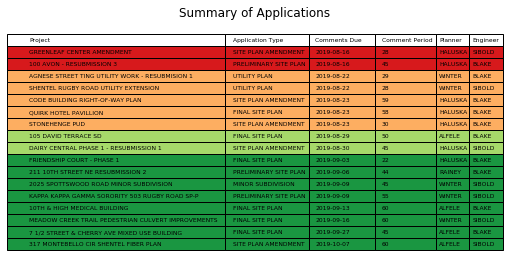

In [6]:
fig, axs = plt.subplots(1,1)
axs.axis('tight')
axs.axis('off')

table = axs.table(
    cellText=cell_text, 
    cellColours= cell_colors, 
    cellLoc='left', 
    colWidths=[0.65, 0.25, 0.2, 0.18, 0.1, 0.1], 
    rowLabels=None, 
    rowColours=None, 
    rowLoc='left', 
    colLabels=col_labels, 
    colColours=None, 
    colLoc='left', 
    loc='center', 
    bbox=None, 
    edges='closed')

table.auto_set_font_size(False)
table.set_fontsize(6)
plt.title('Summary of Applications', y = 1.05)

plt.savefig('./output/drp_table.png', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='letter', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)